In [39]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/c403/pandas/part4/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('C:/Users/c403/pandas/part4/data/시도별_전출입_인구수.xlsx')

# NaN 값을 바로 위의 값으로 변환
df = df.ffill()

# 데이터프레임 생략 안되게 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,-,-,-,332958,333362,398906,425509,409361,382620,434814,476438,472576,567863,503687,509700,505825,506471,481438,482811,512513,447707,494576,531318,526842,540812,510347,462835,502168,523457,576619,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,254634,257011,336312,308307,330810,356080,346330,300357,312343,307188,298679,328978,295529,324045,301498,300467,294120,304505,284734,290429,301479,286105,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,256234,296756,310452,295662,335871,315639,314804,287663,295198,267578,322783,312560,304985,302944,304736,280028,287835,294814,283080,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,전국,울산광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,185987,164160,179485,166690,170587,176413,191255,184499,169681,174389,180375,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,전국,세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,32784,23805,56526,83994,65052,82073


In [47]:
# to_choongnam : 충남 인구 유입량, choongnam_to : 충남 인구 유출량
mask_to_choongnam = (df['전출지별'] != '충청남도') & (df['전입지별'] == '충청남도')
mask_choongnam_to = (df['전출지별'] == '충청남도') & (df['전입지별'] != '충청남도')

##################################충남 인구 유입량 처리#######################################
# df_to_choongnam : 충남 인구 유입량
df_to_choongnam = df[mask_to_choongnam]
df_to_choongnam = df_to_choongnam[1:]
df_to_choongnam = df_to_choongnam.drop(['전입지별'], axis=1)
df_to_choongnam = df_to_choongnam.rename({'전출지별' : '전출지'}, axis=1)
df_to_choongnam = df_to_choongnam.set_index('전출지')

# '충남 유입량' index 추가
df_to_choongnam.loc['충남 유입량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_to_choongnam['1970']) - 1):
    for j in range(len(df_to_choongnam.iloc[0])):
        if(df_to_choongnam.iloc[i,j] == '-'):
            df_to_choongnam.iloc[i,j] = 0
            
# 충남 유입량 계산
for i in range(len(df_to_choongnam['1970']) - 1):
    df_to_choongnam.loc['충남 유입량', :] += df_to_choongnam.iloc[i]
############################################################################################
# df_choongnam_to : 충남 인구 유출량
df_choongnam_to = df[mask_choongnam_to]
df_choongnam_to = df_choongnam_to[1:]
df_choongnam_to = df_choongnam_to.drop(['전출지별'], axis=1)
df_choongnam_to = df_choongnam_to.rename({'전입지별' : '전입지'}, axis=1)
df_choongnam_to = df_choongnam_to.set_index('전입지')

# '충남 유출량' index 추가
df_choongnam_to.loc['충남 유출량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_choongnam_to['1970']) - 1):
    for j in range(len(df_choongnam_to.iloc[0])):
        if(df_choongnam_to.iloc[i,j] == '-'):
            df_choongnam_to.iloc[i,j] = 0


# 충남 유출량 계산
for i in range(len(df_choongnam_to['1970']) - 1):
    df_choongnam_to.loc['충남 유출량', :] += df_choongnam_to.iloc[i]
##############################################################################################
df_choongnam_to

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,67033,63565,40803,53320,61038,115149,81692,76119,83411,77054,83934,83487,85697,92713,85798,79310,70815,74350,74634,55621,50923,42842,36934,33383,28352,26635,26741,26488,24143,28912,27407,26604,26741,26186,26035,26996,27214,27553,26659,26072,23115,21674,20638,19680,19841,19144,18726,18582
부산광역시,4803,4599,3857,4961,7521,10430,9145,9924,10831,7780,8522,7921,6802,7063,6545,5571,5899,6388,6093,3131,3157,2569,2422,2087,1884,1847,1915,2398,2466,2615,2315,2463,2273,2590,2602,2707,2593,2747,2785,2741,2683,2881,2408,2328,2920,2548,2210,2303
대구광역시,0,0,0,0,0,0,0,0,0,0,0,3453,3754,3834,3453,3057,3646,3643,3400,1757,1630,1432,1341,1318,1196,1393,1392,1479,1584,1619,1676,1570,1679,1840,1658,1943,1760,2039,1929,2011,1849,2128,1925,2038,2157,1999,1780,1754
인천광역시,0,0,0,0,0,0,0,0,0,0,0,13948,12101,14864,15857,13834,13236,15325,15054,12016,12651,11859,10527,9571,8812,8292,8204,8471,7598,8860,8449,8136,9284,8544,8992,8734,8595,9110,8645,7899,7441,7214,7180,6793,6784,6636,6407,6251
광주광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1425,1671,1847,1016,1090,976,1005,864,775,868,946,1397,1171,1149,1134,1115,1206,1224,1354,1628,1580,1530,1606,1644,1554,1617,1489,1450,1797,1468,1427,1447
대전광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31199,32617,32568,25886,28190,26376,25953,25779,28966,24948,28084,25750,25347,26185,28359,28460,27386,26066,25609,23097,21214,21341,21494,18126,16502,17037,15551,15298,15082
울산광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,943,987,1052,1058,1017,1013,1031,1081,1072,1189,1231,1218,1025,1044,1306,1158,1376,1227,1468,1136,947
세종특별자치시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4514,2915,6103,8384,5868,6587
경기도,19969,23202,17362,22768,24896,53818,33809,35677,41919,43091,43492,32414,32786,42390,42274,39334,41894,49213,48873,38743,37746,35567,32597,32604,29658,29663,29913,31658,28972,34752,34994,36400,39866,40012,39801,41960,40570,41207,39780,38543,37414,35482,33244,31534,31925,33277,32054,31357


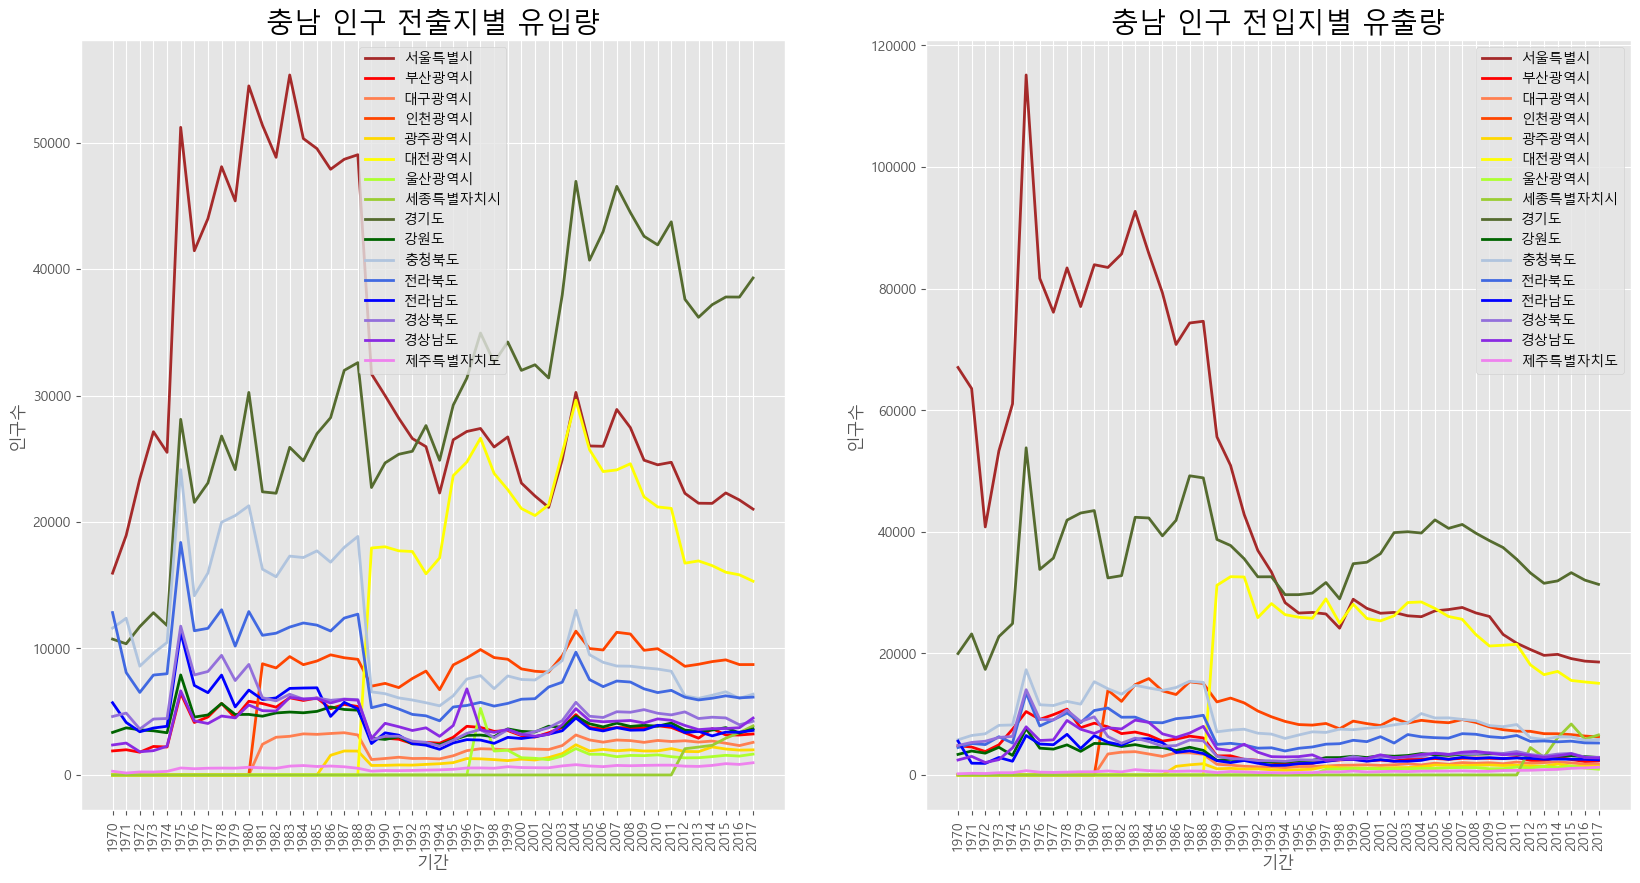

In [63]:
# 축 년도
col_years = list(map(str, range(1970, 2018)))
to_choongnam = df_to_choongnam.loc['충남 유입량', :]
choongnam_to = df_choongnam_to.loc['충남 유출량', :]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 색깔
colorss = [ 'brown', 'red', 'coral', 'orangered', 'gold', 'yellow', 'greenyellow', 'yellowgreen', 'darkolivegreen', 'darkgreen', 'lightsteelblue', 'royalblue', 'blue', 'mediumpurple', 'blueviolet', 'violet']

# axe 객체에 plot 함수로 '충남 유입량' 그래프 출력
for i in range(len(colorss)):
    ax1.plot(col_years, df_to_choongnam.iloc[i], marker='', markerfacecolor=colorss[i],
            markersize=5, color=colorss[i], linewidth=2, label=df_choongnam_to.iloc[i].name)
#ax1.plot(col_years, to_choongnam, marker='o', markerfacecolor='red',
#        markersize=5, color='red', linewidth=2, label='총 유입량')

# axe 객체에 plot 함수로 '충남 유출량' 그래프 출력
for i in range(len(colorss)):
    ax2.plot(col_years, df_choongnam_to.iloc[i], marker='', markerfacecolor=colorss[i],
            markersize=5, color=colorss[i], linewidth=2, label=df_to_choongnam.iloc[i].name)
#ax2.plot(col_years, choongnam_to, marker='o', markerfacecolor='skyblue',
#        markersize=5, color='skyblue', linewidth=2, label='총 유입량')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')

# 차트 제목 추가
ax1.set_title('충남 인구 전출지별 유입량', size=20)
ax2.set_title('충남 인구 전입지별 유출량', size=20)

# 축 이름 추가
ax1.set_xlabel('기간', size=12)
ax1.set_ylabel('인구수', size=12)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('인구수', size=12)

# 축 눈금 위치 지정
ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))

# x축 눈금 라벨 회전하기
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)

# 축 눈금 레이블 크기
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

plt.show()